In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar

In [2]:
stock = 'aapl'

In [3]:
start = pd.to_datetime(['2019-01-01']).astype(int)[0]//10**9
end = pd.to_datetime(['2022-08-05']).astype(int)[0]//10**9
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168339,148158800
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366501,365248800
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753826,219111200
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435402,164101200


In [5]:
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

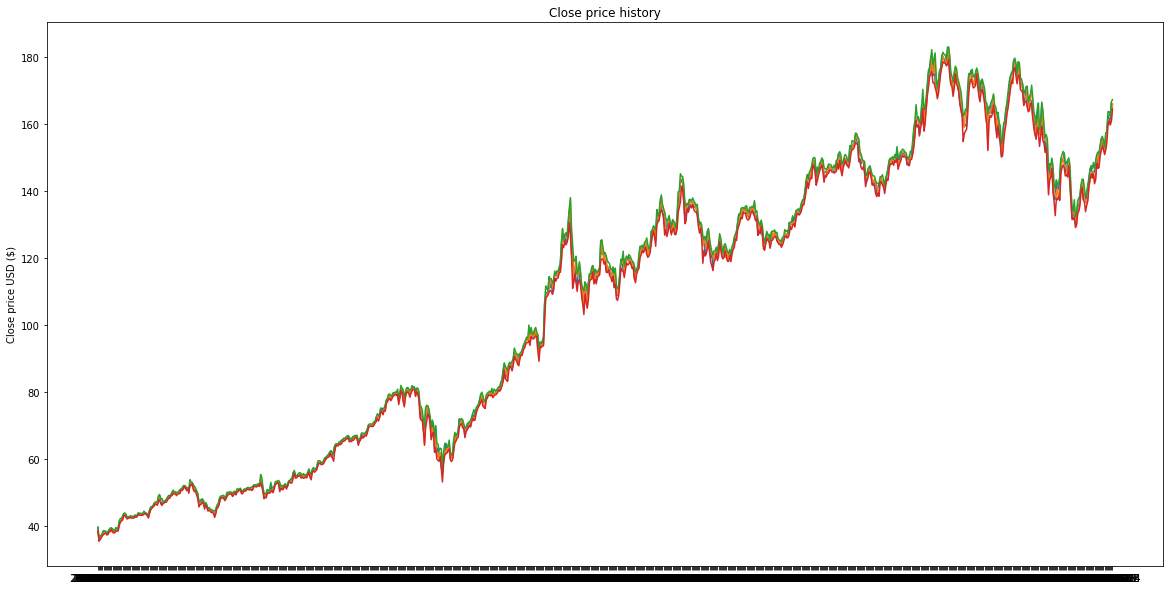

In [6]:
plt.figure(figsize=(20,10))
plt.title('Close price history')
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.plot(df['High'])
plt.plot(df['Low'])

plt.ylabel('Close price USD ($)')

plt.show()

In [7]:
df.drop(['Volume', 'Adj Close'],axis=1, inplace=True)

In [8]:
df.head(5)

,Open,High,Low,Close
Date,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000
2019-01-03,35.994999,36.430000,35.500000,35.547501
2019-01-04,36.132500,37.137501,35.950001,37.064999
2019-01-07,37.174999,37.207500,36.474998,36.982498
2019-01-08,37.389999,37.955002,37.130001,37.687500


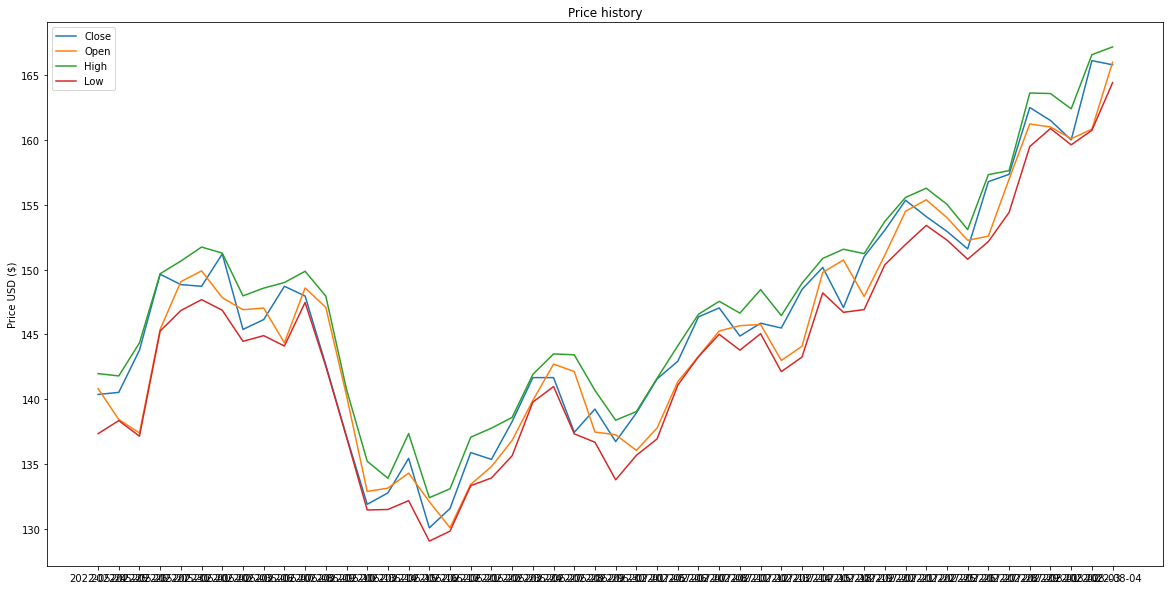

In [9]:
plt.figure(figsize=(20,10))
plt.title('Price history')
plt.plot(df['Close'][-50:], label='Close')
plt.plot(df['Open'][-50:], label='Open')
plt.plot(df['High'][-50:], label='High')
plt.plot(df['Low'][-50:], label='Low')

plt.ylabel('Price USD ($)')
plt.legend()
plt.show()

In [10]:
df['days'] = 0

In [11]:
df['mont'] = 0
for i in df.index:
    df.loc[i,'mont'] = int(i.split('-')[1])

In [12]:
for i in df.index:
    y,m,d = i.split('-')[0],i.split('-')[1],i.split('-')[2]
    weekd = calendar.weekday(int(y),int(m),int(d))
    df.loc[i, 'days'] = weekd

In [13]:
df.head(20)

,Open,High,Low,Close,days,mont
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,2,1
2019-01-03,35.994999,36.430000,35.500000,35.547501,3,1
2019-01-04,36.132500,37.137501,35.950001,37.064999,4,1
2019-01-07,37.174999,37.207500,36.474998,36.982498,0,1
2019-01-08,37.389999,37.955002,37.130001,37.687500,1,1
2019-01-09,37.822498,38.632500,37.407501,38.327499,2,1
2019-01-10,38.125000,38.492500,37.715000,38.450001,3,1
2019-01-11,38.220001,38.424999,37.877499,38.072498,4,1
2019-01-14,37.712502,37.817501,37.305000,37.500000,0,1


# Maximum daily

In [14]:
df['d_max_h'] = 0

In [15]:
for i in range(len(df['High'])-1):
    df.iloc[i+1, 6] = df.iloc[i, 1]
print(df.head(5))
print(df.tail(5))

                 Open       High        Low      Close  days  mont    d_max_h
Date                                                                         
2019-01-02  38.722500  39.712502  38.557499  39.480000     2     1   0.000000
2019-01-03  35.994999  36.430000  35.500000  35.547501     3     1  39.712502
2019-01-04  36.132500  37.137501  35.950001  37.064999     4     1  36.430000
2019-01-07  37.174999  37.207500  36.474998  36.982498     0     1  37.137501
2019-01-08  37.389999  37.955002  37.130001  37.687500     1     1  37.207500
                  Open        High         Low       Close  days  mont  \
Date                                                                     
2022-07-29  161.240005  163.630005  159.500000  162.509995     4     7   
2022-08-01  161.009995  163.589996  160.889999  161.509995     0     8   
2022-08-02  160.100006  162.410004  159.630005  160.009995     1     8   
2022-08-03  160.839996  166.589996  160.750000  166.130005     2     8   
2022-08-04

# Minimum daily

In [16]:
df['d_min'] = 0

In [17]:
for i in range(len(df['Low'])-1):
    df.iloc[i+1, 7] = df.iloc[i, 2]
#print(df.head(5))
#print(df.tail(5))

# Maximum weekly

In [18]:
df['w_max_h'] = 0

In [19]:
d = []
for n, (i, j) in enumerate(zip(df.iloc[:, 4], df.iloc[1:, 4])):
        if int(i)<int(j):
            d.append(df.iloc[n, 1])
        else:
            df.iloc[n+1, 8]= max(d)
            d.clear()
    

    
print(df.head(15))
print(df.tail(5))

                 Open       High        Low      Close  days  mont    d_max_h  \
Date                                                                            
2019-01-02  38.722500  39.712502  38.557499  39.480000     2     1   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501     3     1  39.712502   
2019-01-04  36.132500  37.137501  35.950001  37.064999     4     1  36.430000   
2019-01-07  37.174999  37.207500  36.474998  36.982498     0     1  37.137501   
2019-01-08  37.389999  37.955002  37.130001  37.687500     1     1  37.207500   
2019-01-09  37.822498  38.632500  37.407501  38.327499     2     1  37.955002   
2019-01-10  38.125000  38.492500  37.715000  38.450001     3     1  38.632500   
2019-01-11  38.220001  38.424999  37.877499  38.072498     4     1  38.492500   
2019-01-14  37.712502  37.817501  37.305000  37.500000     0     1  38.424999   
2019-01-15  37.567501  38.347500  37.512501  38.267502     1     1  37.817501   
2019-01-16  38.270000  38.97

# Minimum weekly

In [20]:
df['w_min'] = 0

In [21]:
d = []
for n, (i, j) in enumerate(zip(df.iloc[:, 4], df.iloc[1:, 4])):
        if int(i)<int(j):
            d.append(df.iloc[n, 2])
        else:
            df.iloc[n+1, 9]= min(d)
            d.clear()
    
print(df.head(15))
print(df.tail(5))

                 Open       High        Low      Close  days  mont    d_max_h  \
Date                                                                            
2019-01-02  38.722500  39.712502  38.557499  39.480000     2     1   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501     3     1  39.712502   
2019-01-04  36.132500  37.137501  35.950001  37.064999     4     1  36.430000   
2019-01-07  37.174999  37.207500  36.474998  36.982498     0     1  37.137501   
2019-01-08  37.389999  37.955002  37.130001  37.687500     1     1  37.207500   
2019-01-09  37.822498  38.632500  37.407501  38.327499     2     1  37.955002   
2019-01-10  38.125000  38.492500  37.715000  38.450001     3     1  38.632500   
2019-01-11  38.220001  38.424999  37.877499  38.072498     4     1  38.492500   
2019-01-14  37.712502  37.817501  37.305000  37.500000     0     1  38.424999   
2019-01-15  37.567501  38.347500  37.512501  38.267502     1     1  37.817501   
2019-01-16  38.270000  38.97

# Maximum montly

In [22]:
df['m_max_h'] = 0

In [23]:
d = []
for n, (i, j) in enumerate(zip(df.iloc[:, 5], df.iloc[1:,5])):
        if int(i)==int(j):
            d.append(df.iloc[n, 1])
        else:
            df.iloc[n+1, 10]= max(d)
            d.clear()

In [24]:
print(df.head(35))

                 Open       High        Low      Close  days  mont    d_max_h  \
Date                                                                            
2019-01-02  38.722500  39.712502  38.557499  39.480000     2     1   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501     3     1  39.712502   
2019-01-04  36.132500  37.137501  35.950001  37.064999     4     1  36.430000   
2019-01-07  37.174999  37.207500  36.474998  36.982498     0     1  37.137501   
2019-01-08  37.389999  37.955002  37.130001  37.687500     1     1  37.207500   
2019-01-09  37.822498  38.632500  37.407501  38.327499     2     1  37.955002   
2019-01-10  38.125000  38.492500  37.715000  38.450001     3     1  38.632500   
2019-01-11  38.220001  38.424999  37.877499  38.072498     4     1  38.492500   
2019-01-14  37.712502  37.817501  37.305000  37.500000     0     1  38.424999   
2019-01-15  37.567501  38.347500  37.512501  38.267502     1     1  37.817501   
2019-01-16  38.270000  38.97

# Minimum montly

In [25]:
df['m_min'] = 0

In [26]:
d = []
for n, (i, j) in enumerate(zip(df.iloc[:, 5], df.iloc[1:,5])):
        if int(i)==int(j):
            d.append(df.iloc[n, 2])
        else:
            df.iloc[n+1, 11]= min(d)
            d.clear()
    
print(df.head(35))
#print(df.tail(5))

                 Open       High        Low      Close  days  mont    d_max_h  \
Date                                                                            
2019-01-02  38.722500  39.712502  38.557499  39.480000     2     1   0.000000   
2019-01-03  35.994999  36.430000  35.500000  35.547501     3     1  39.712502   
2019-01-04  36.132500  37.137501  35.950001  37.064999     4     1  36.430000   
2019-01-07  37.174999  37.207500  36.474998  36.982498     0     1  37.137501   
2019-01-08  37.389999  37.955002  37.130001  37.687500     1     1  37.207500   
2019-01-09  37.822498  38.632500  37.407501  38.327499     2     1  37.955002   
2019-01-10  38.125000  38.492500  37.715000  38.450001     3     1  38.632500   
2019-01-11  38.220001  38.424999  37.877499  38.072498     4     1  38.492500   
2019-01-14  37.712502  37.817501  37.305000  37.500000     0     1  38.424999   
2019-01-15  37.567501  38.347500  37.512501  38.267502     1     1  37.817501   
2019-01-16  38.270000  38.97

# 3 month max------------------------------------------------------------------------------

In [84]:
df['3m_max_h'] = 0

In [86]:
d = []

for n, i in enumerate(df.iloc[:, 5]):
    if i != 4:
        d.append(df.iloc[n, 2])
    elif i == 4 and df.iloc[n, 11] != 0: 
        df.iloc[n, 12] = max(d)
        d.clear()
        
    
    if i != 7:
        d.append(df.iloc[n, 2])
    elif i == 7 and df.iloc[n, 11] != 0: 
        df.iloc[n, 12] = max(d)
        d.clear()
        
    
    if i != 10:
        d.append(df.iloc[n, 2])
    elif i == 10 and df.iloc[n, 11] != 0: 
        df.iloc[n, 12] = max(d)
        d.clear()
    
    if i != 1:
        d.append(df.iloc[n, 2])
    elif i == 1 and df.iloc[n, 11] != 0: 
        df.iloc[n, 12] = max(d)
        d.clear()
                
    
  

# 3 month min

In [91]:
df['3m_min'] = 0

In [92]:
d = []

for n, i in enumerate(df.iloc[:, 5]):
    if i != 4:
        d.append(df.iloc[n, 2])
    elif i == 4 and df.iloc[n, 12] != 0: 
        df.iloc[n, 13] = min(d)
        d.clear()
        
    
    if i != 7:
        d.append(df.iloc[n, 2])
    elif i == 7 and df.iloc[n, 12] != 0: 
        df.iloc[n, 13] = min(d)
        d.clear()
        
    
    if i != 10:
        d.append(df.iloc[n, 2])
    elif i == 10 and df.iloc[n, 12] != 0: 
        df.iloc[n, 13] = min(d)
        d.clear()
    
    if i != 1:
        d.append(df.iloc[n, 2])
    elif i == 1 and df.iloc[n, 12] != 0: 
        df.iloc[n, 13] = min(d)
        d.clear()
                

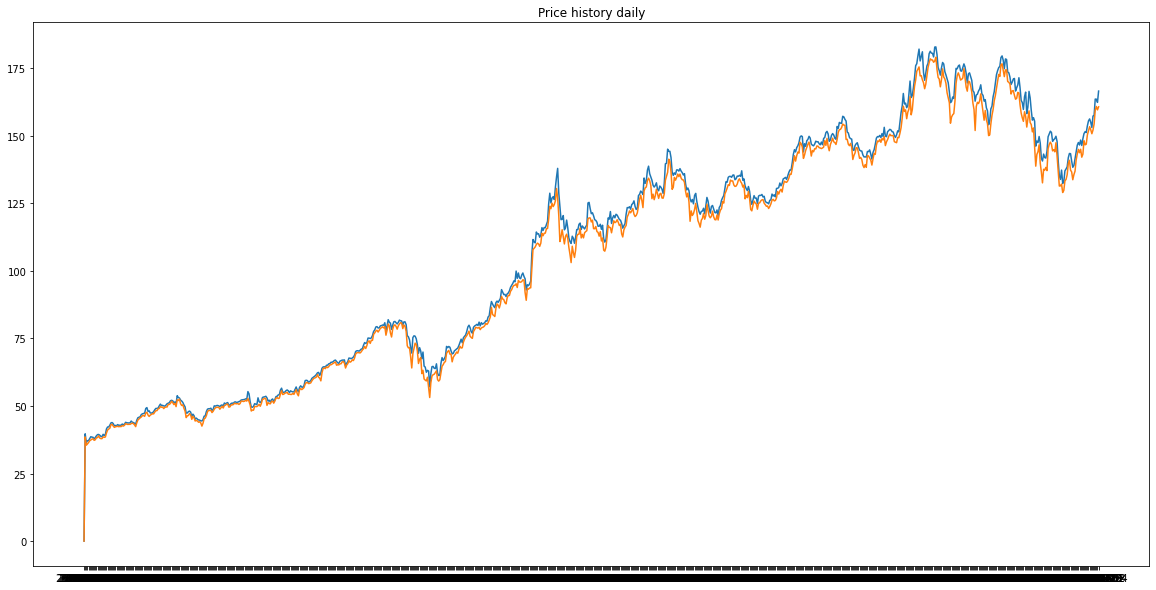

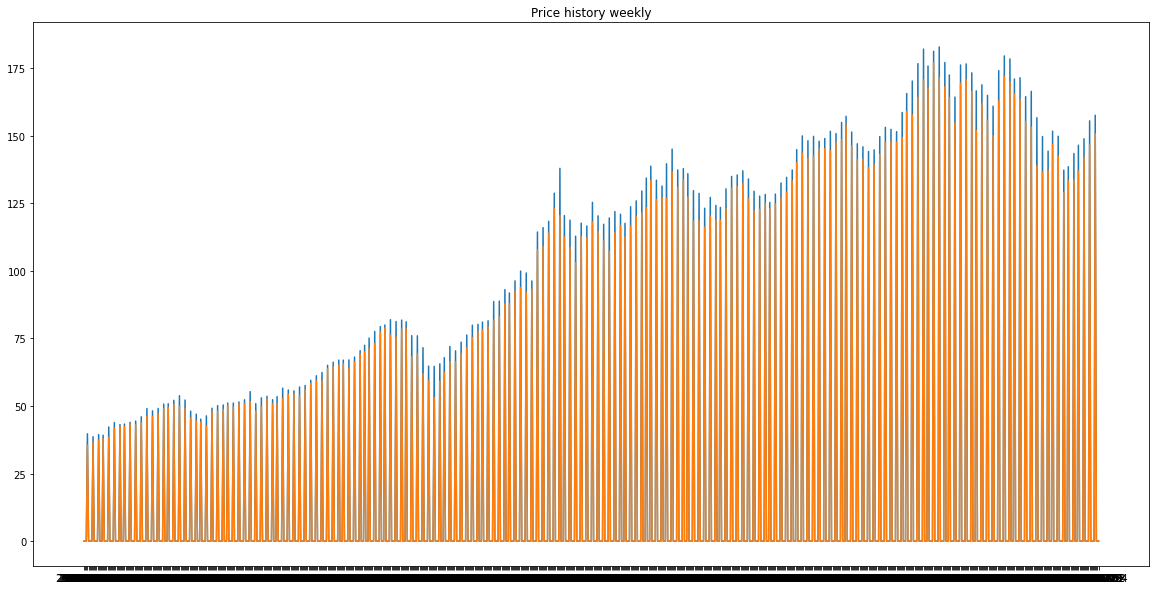

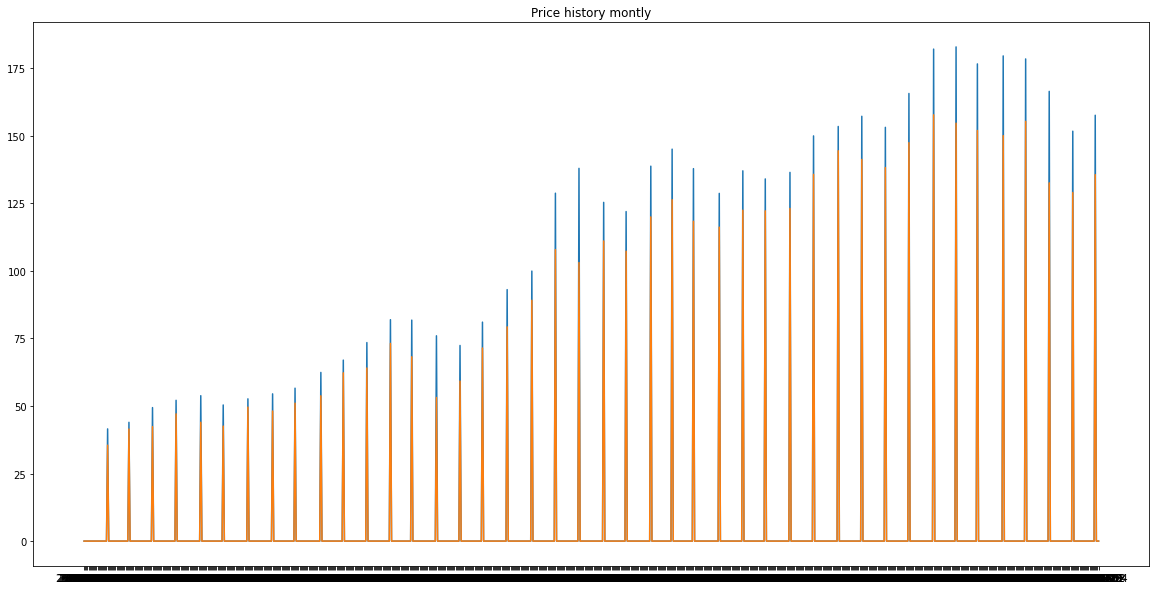

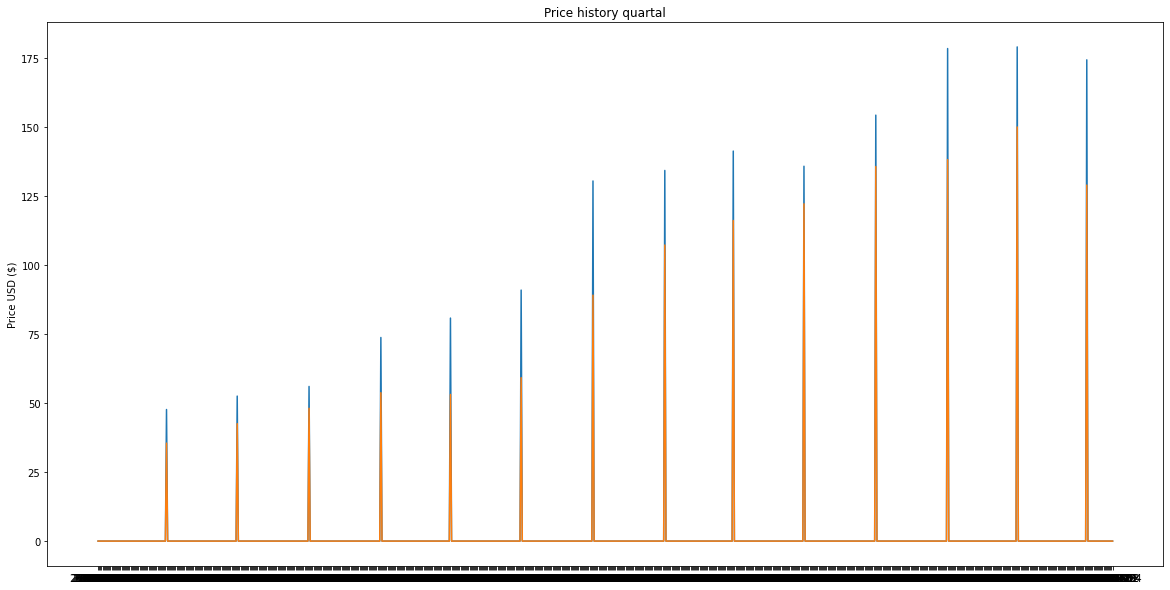

In [94]:
plt.figure(figsize=(20,10))
plt.title('Price history daily')
plt.plot(df['d_max_h'])
plt.plot(df['d_min'])
plt.figure(figsize=(20,10))
plt.title('Price history weekly')
plt.plot(df['w_max_h'])
plt.plot(df['w_min'])
plt.figure(figsize=(20,10))
plt.title('Price history montly')
plt.plot(df['m_max_h'])
plt.plot(df['m_min'])
plt.figure(figsize=(20,10))
plt.title('Price history quartal')
plt.plot(df['3m_max_h'])
plt.plot(df['3m_min'])

plt.ylabel('Price USD ($)')

plt.show()

In [95]:
df.to_csv('data.csv')